In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data and examine descriptive statistics

In [2]:
df= pd.read_csv('diabetes.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Replace zeros with column median in columns in which zero shouldn't exist

In [3]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].median())
    
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Examine feature distributions

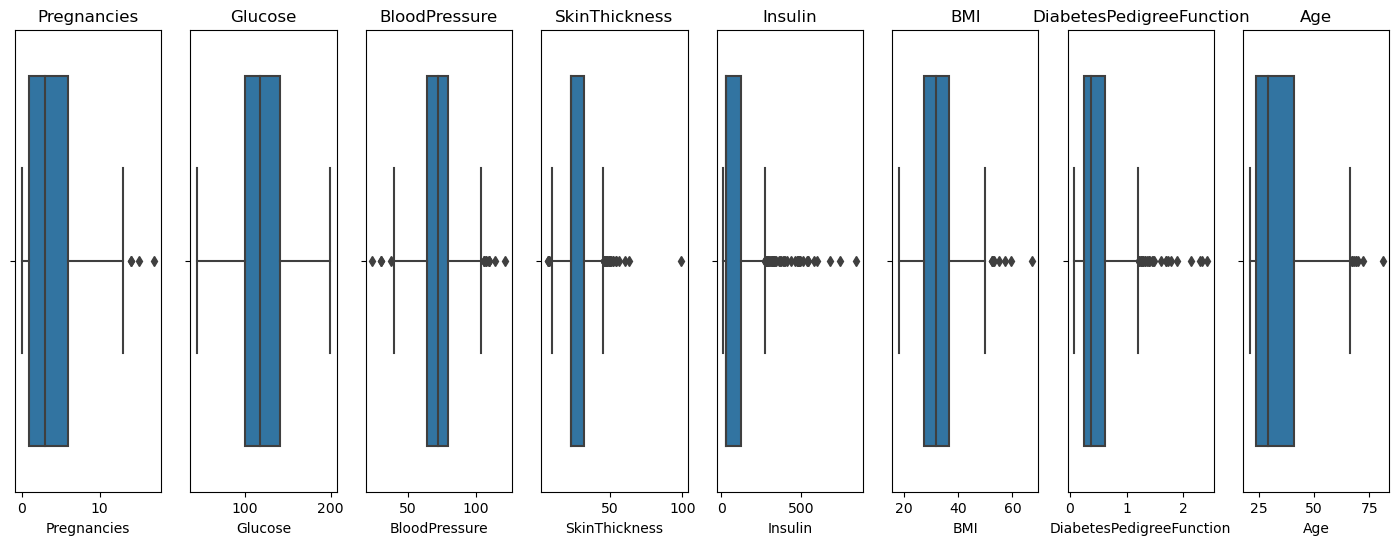

In [4]:
fig= plt.figure(figsize= (20, 6))   # Look for outliers
for i in np.arange(1, len(df.columns)):
    d= plt.subplot(1, len(df.columns), i, title= df.columns[i-1])
    sns.boxplot(x= df[df.columns[i-1]])
plt.show()

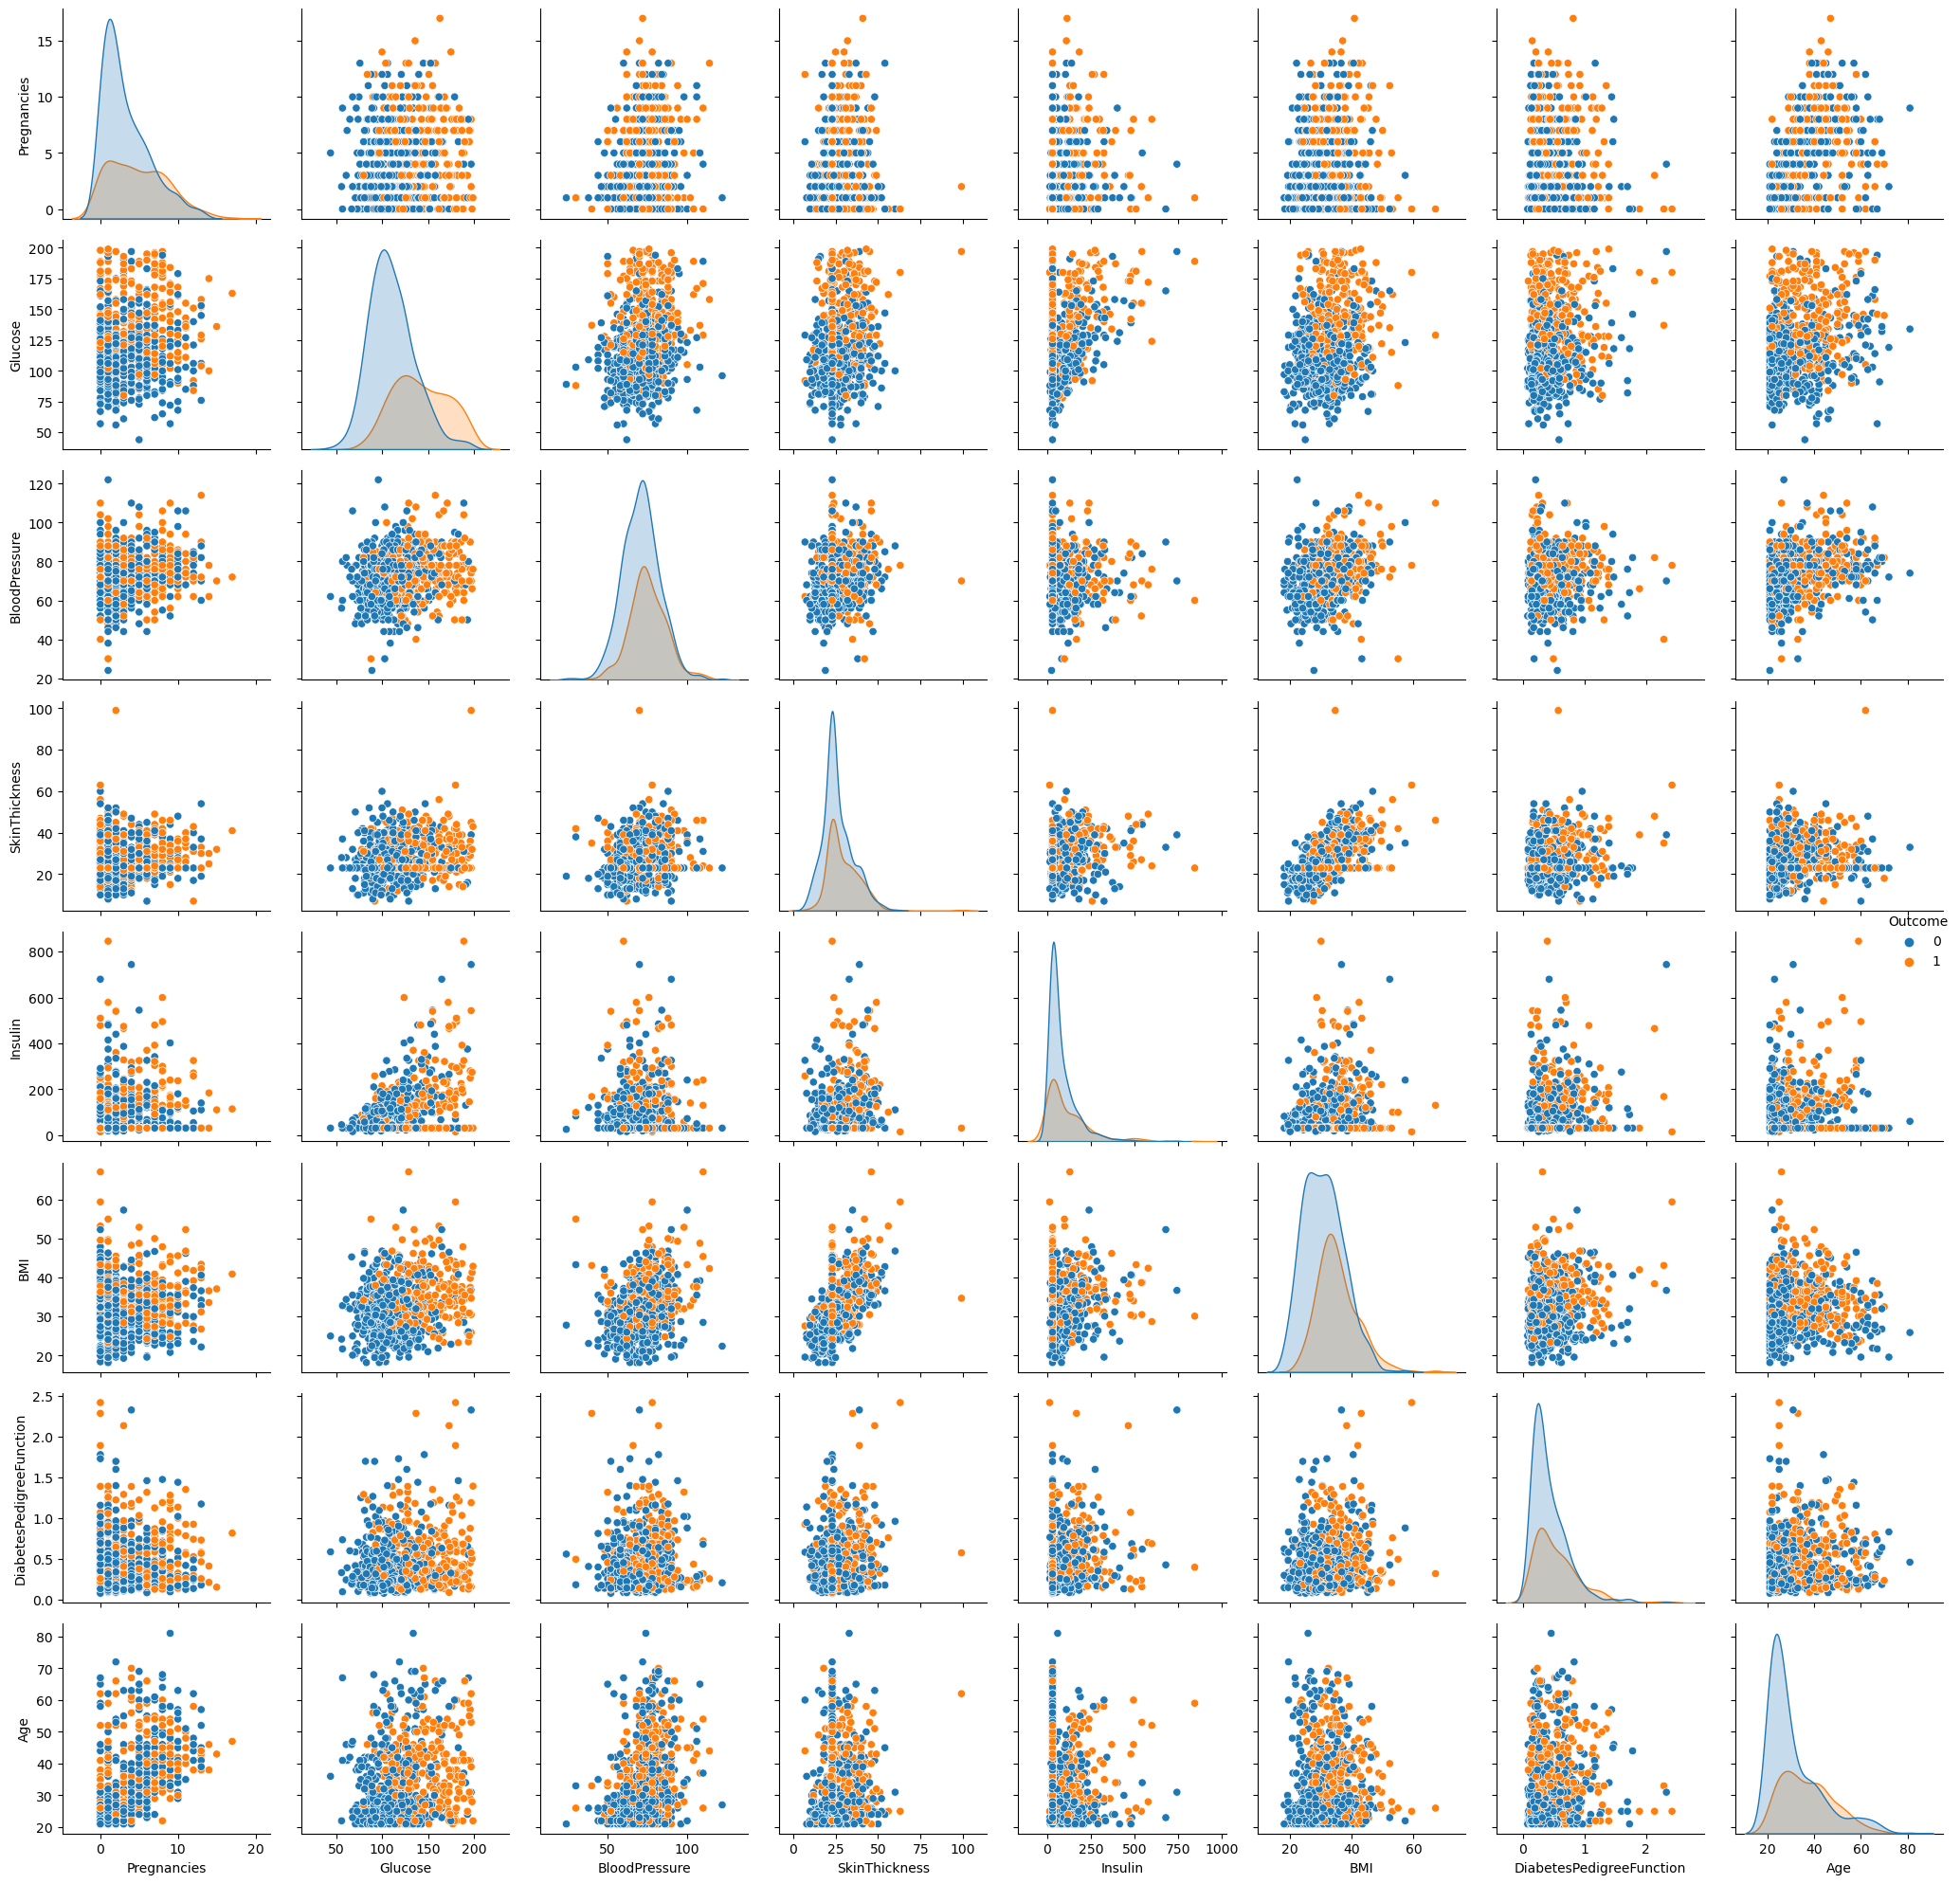

In [5]:
sns.pairplot(data=df,hue='Outcome')
plt.tight_layout()
plt.show()

### Correlation matrix and heatmap

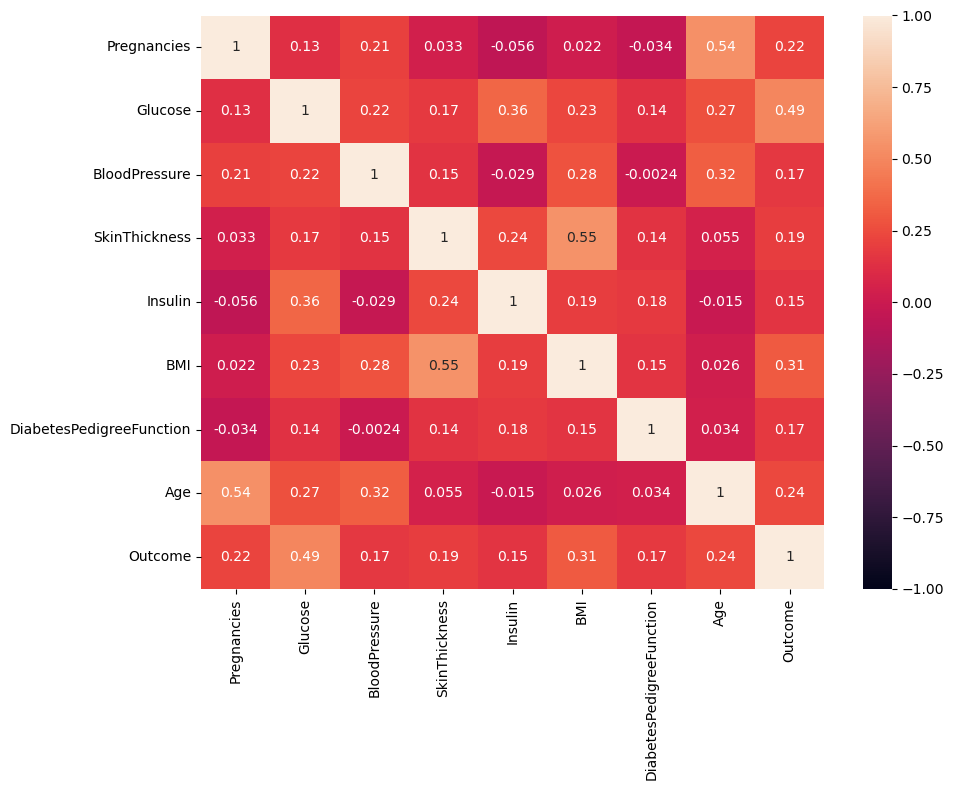

In [6]:
corr =df.corr()

fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, vmin=-1)
plt.tight_layout()
plt.show()

In [7]:
corr_df = corr.stack().reset_index()
corr_df.columns = ['variable1', 'variable2', 'correlation']
corr_df = corr_df[corr_df.variable2 > corr_df.variable1]
corr_df = corr_df.loc[corr_df.correlation.abs().sort_values(ascending= False).index]

corr_df[corr_df.correlation.abs() > 0.7]

,variable1,variable2,correlation


### Examine target distribution

In [9]:
df.Outcome.value_counts(dropna= False)

0    500
1    268
Name: Outcome, dtype: int64

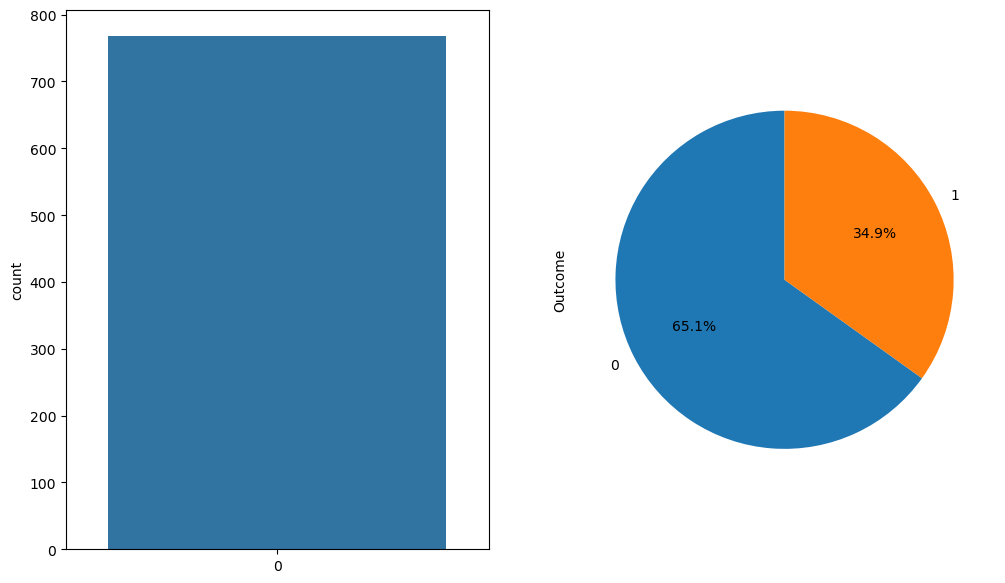

In [10]:
fig, ax= plt.subplots(1, 2, figsize=(12,7))
sns.countplot(df['Outcome'], ax= ax[0])

df.Outcome.value_counts().plot.pie(autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

In [11]:
# Now on to classification in ML using SVM, Logistic Reg., Decision Tree
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix, \
  accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
df_features=df.drop('Outcome', axis=1)
X_train,X_test,y_train,y_test = train_test_split(df_features,
                                                 df.Outcome,
                                                 test_size=0.2, 
                                                 stratify= df.Outcome,
                                                 random_state= 303)

print(f'Dimensions \nTraining:{X_train.shape} \nTesting:{X_test.shape}\n')
print(f'Target Distribution')
print(f'Training \n{y_train.value_counts().sort_index()}')
print(f'Testing \n{y_test.value_counts().sort_index()}')

Dimensions 
Training:(614, 8) 
Testing:(154, 8)

Target Distribution
Training 
0    400
1    214
Name: Outcome, dtype: int64
Testing 
0    100
1     54
Name: Outcome, dtype: int64


In [13]:
model_performance = {}

In [14]:
model_svm = svm.SVC(kernel='linear', random_state= 303)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
model_performance['SVM'] = {'acc':accuracy_score(y_test,y_pred), 
                            'prec':precision_score(y_test,y_pred), 
                            'recall':recall_score(y_test,y_pred)}

print('******* Support Vector Machine *******')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



model_logr = LogisticRegression(max_iter=500)
model_logr.fit(X_train, y_train)
y_pred=model_logr.predict(X_test)
model_performance['LogReg'] = {'acc':accuracy_score(y_test, y_pred), 
                               'prec':precision_score(y_test, y_pred), 
                               'recall':recall_score(y_test, y_pred)}

print('*******  Logistic Regression *******')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




model_tree = DecisionTreeClassifier(random_state= 303)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)
model_performance['DecTree'] = {'acc':accuracy_score(y_test, y_pred), 
                                'prec':precision_score(y_test, y_pred), 
                                'recall':recall_score(y_test, y_pred)}

print('******* Decision Tree Classifier *******')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

******* Support Vector Machine *******
[[85 15]
 [22 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

*******  Logistic Regression *******
[[85 15]
 [20 34]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

******* Decision Tree Classifier *******
[[67 33]
 [17 37]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       100
           1       0.53      0.69      0.60        54

    accu

In [15]:
model_performance = pd.DataFrame(model_performance).T

model_performance

,acc,prec,recall
SVM,0.759740,0.680851,0.592593
LogReg,0.772727,0.693878,0.629630
DecTree,0.675325,0.528571,0.685185


In [16]:
model_performance.idxmax(axis= 0)

acc        LogReg
prec       LogReg
recall    DecTree
dtype: object